In [1]:
%load_ext autoreload
%autoreload 2
%run ../src/preamble.py

#### Original Kravchuk transform

- **Pascal, B.**, & Bardenet, R. (2022). A covariant, discrete time-frequency representation tailored for zero-based signal detection. *IEEE Transactions on Signal Processing*, 70, 2950–2961. [hal-03553433](https://hal.archives-ouvertes.fr/hal-03553433/document)

- **Pascal, B.**, & Bardenet, R. (2022, September). Une famille de représentations covariantes de signaux discrets et son application à la détection de signaux à partir de leurs zéros. *GRETSI’22 XXVIIIème Colloque Francophone De Traitement Du Signal Et Des Images*. [hal-03614725](https://hal.archives-ouvertes.fr/hal-03614725/document)

#### Novel aligned Kravchuk transform

- **Pascal, B.**, Flamant, J., & Bardenet, R. (2025). Transformée de Kravchuk réalignée, implémentation efficace et illustration sur signaux élémentaires et réels. *Submitted*. [hal-05013793](https://hal.science/hal-05013793v2/document)

#### General settings

In [4]:
# numbers of points to be explored
N              = np.array([64, 128, 256, 512, 1024, 2048, 4096])

# signal-to-noise ratio
snr            = np.inf

# total duration of the signal
observe        = 20

# choice of the seed
random.seed(10)

# number of realizations
R              = 100

#### Characteristics of the elementary signals

In [6]:
# location of the mass for the Dirac signal
location       = 13

# frequency of the sine
frequency      = 1

# duration of the chirp
duration       = 15

#### Computational time and precision on elementary signals

In [8]:
# Dirac mass
ser_Dirac = time_and_precision(N,R = 1,type = 'Dirac',param = location,snr = snr,calc = 'precision')
print('Processed Dirac signals.')

# Pure sine
ser_sine = time_and_precision(N,R = 1,type = 'sine',param = frequency,snr = snr,calc = 'precision')
print('Processed sine signals.')

# Linear chirp
to_chirp, tn_chirp, ser_chirp = time_and_precision(N,R = 1,type = 'chirp',param = duration,snr = snr,calc = 'time-and-precision')
print('Processed chirp signals.')

Finished R = 100 realizations of signals of size N = 64.
Finished R = 100 realizations of signals of size N = 128.
Finished R = 100 realizations of signals of size N = 256.
Finished R = 100 realizations of signals of size N = 512.
Finished R = 100 realizations of signals of size N = 1024.
Finished R = 100 realizations of signals of size N = 2048.
Finished R = 100 realizations of signals of size N = 4096.
Processed Dirac signals.
Finished R = 100 realizations of signals of size N = 64.
Finished R = 100 realizations of signals of size N = 128.
Finished R = 100 realizations of signals of size N = 256.
Finished R = 100 realizations of signals of size N = 512.
Finished R = 100 realizations of signals of size N = 1024.
Finished R = 100 realizations of signals of size N = 2048.
Finished R = 100 realizations of signals of size N = 4096.
Processed sine signals.
Finished R = 100 realizations of signals of size N = 64.
Finished R = 100 realizations of signals of size N = 128.
Finished R = 100 rea

#### Display results

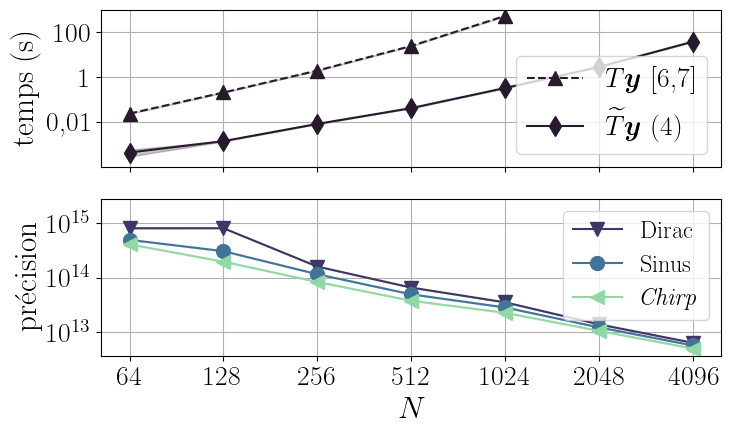

In [16]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8, 4.5))

# display the computational time
ax1.fill_between(np.log2(N[:-2]),np.log10(to_chirp[0,:-2] - to_chirp[1,:-2]),
                 np.log10(to_chirp[0,:-2] - to_chirp[1,:-2]),color = d[1,:],alpha = 0.25)
ax1.plot(np.log2(N[:-2]),np.log10(to_chirp[0,:-2]),'^--',color = d[1,:],markersize = 10,label = r'$T\boldsymbol{y}$ [6,7]')
ax1.fill_between(np.log2(N),np.log10(tn_chirp[0,:] - tn_chirp[1,:]),
                 np.log10(tn_chirp[0,:] + tn_chirp[1,:]),color = d[1,:],alpha = 0.25)
ax1.plot(np.log2(N),np.log10(tn_chirp[0,:]),'d-',color = d[1,:],markersize = 10,label = r'$\widetilde{T}\boldsymbol{y}$ (4)')
ax1.grid()
ax1.set_ylabel(r'temps (s)')
ax1.legend(loc = 'lower right')

ya = ax1.get_yticks()
yl = 10 ** ya
yl = yl.astype(str)
ax1.set_yticks([-2,0,2],['0,01','1','100'])
ax1.set_xticks(np.log2(N),[])
ax1.set_ylim([-4,3])


# display the reconstruction precision
ax2.fill_between(np.log2(N),np.log10(ser_Dirac[0,:]-ser_Dirac[1,:]),np.log10(ser_Dirac[0,:]+ser_Dirac[1,:]),color = cm,alpha = 0.25)
ax2.plot(np.log2(N),np.log10(ser_Dirac[0,:]),'v-',color = cm,markersize = 10,label=r'Dirac')
ax2.fill_between(np.log2(N),np.log10(ser_sine[0,:]-ser_sine[1,:]),np.log10(ser_sine[0,:]+ser_sine[1,:]),color = d[3,:],alpha = 0.25)
ax2.plot(np.log2(N),np.log10(ser_sine[0,:]),'o-',color = d[3,:],markersize = 10,label=r'Sinus')
ax2.fill_between(np.log2(N),np.log10(ser_chirp[0,:]-ser_chirp[1,:]),np.log10(ser_chirp[0,:]+ser_chirp[1,:]),color = d[5,:],alpha = 0.25)
ax2.plot(np.log2(N),np.log10(ser_chirp[0,:]),'<-',color = d[5,:],markersize = 10,label=r'\textit{Chirp}')
ax2.grid()
ax2.set_xlabel(r'$N$')
ax2.set_ylabel(r'précision')
ax2.set_xticks(np.log2(N),N.astype(str))
ax2.set_yticks([13, 14, 15],['$10^{13}$','$10^{14}$','$10^{15}$'])
ax2.set_ylim([12.55,15.45])
ax2.legend(loc = 'upper right', fontsize = 17.5)